# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [7]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

[autoreload of boosting failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/boosting.py", line 2
    from matplotlib.pyplot as plt
                 

CPU times: user 2.19 s, sys: 4.09 ms, total: 2.2 s
Wall time: 2.47 s
Train ROC-AUC 0.9895
Valid ROC-AUC 0.9130
Test ROC-AUC 0.9129


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

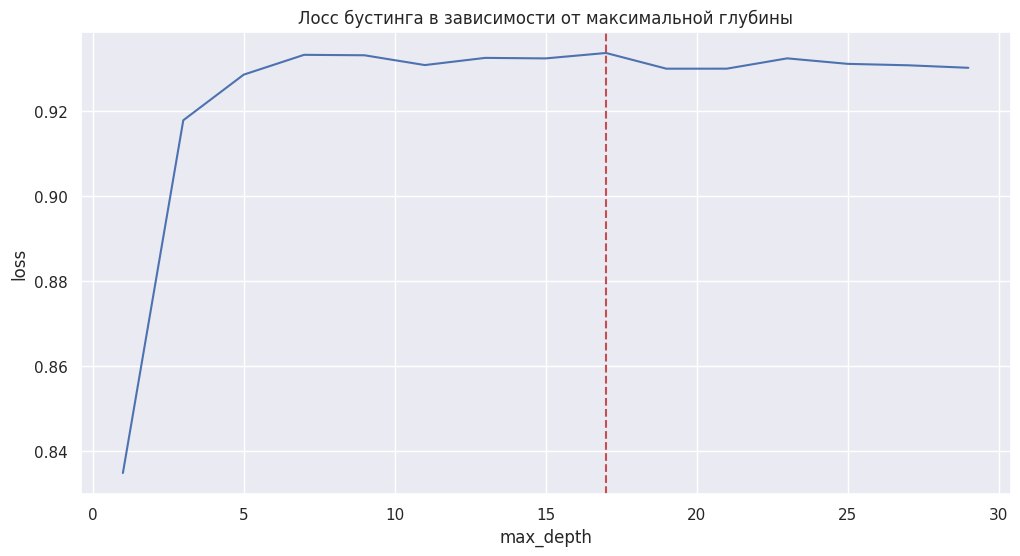

In [8]:
results = {}

depths = range(1, 30, 2)

for max_depth in depths:
  base_model_params = {'max_depth' : max_depth, 'min_samples_split': 2, 'min_samples_leaf': 10}
  boosting = Boosting(base_model_params)
  boosting.fit(x_train, y_train, x_valid, y_valid)
  result = boosting.score(x_test, y_test)
  results[max_depth] = result


max_depth_with_max_loss = max(results, key=results.get)
plt.figure(figsize = (12, 6))
plt.plot(results.keys(), results.values())
plt.axvline(x=max_depth_with_max_loss, color='r', linestyle='--', label=f'Max Depth: {max_depth_with_max_loss}')
plt.title("Лосс бустинга в зависимости от максимальной глубины")
plt.xlabel('max_depth')
plt.ylabel('loss')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучше всего модель с глубиной 25. Но при этом качество не сильно отличается на глубине больше 5. Скорее всего модель слишком простая на маленькой глубине и там недостаточно рандома


## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [10]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [12]:
import optuna

def objective(trial, x_train = x_train, y_train = y_train, x_valid = x_valid, y_valid = y_valid):
    base_model_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10),
    }

    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 20)

    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        base_model_params = base_model_params
    )

    model.fit(x_train, y_train, x_valid, y_valid)
    model_score = model.score(x_valid, y_valid)

    return model_score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2023-12-24 14:11:31,493] A new study created in memory with name: no-name-12754c66-58fd-48ca-8184-5a1123990667
[I 2023-12-24 14:11:44,580] Trial 0 finished with value: 0.9419531573641499 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 5, 'n_estimators': 171, 'learning_rate': 0.09307777538928556, 'subsample': 0.15460364026106538, 'early_stopping_rounds': 11}. Best is trial 0 with value: 0.9419531573641499.
[I 2023-12-24 14:12:24,251] Trial 1 finished with value: 0.941864558165374 and parameters: {'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2, 'n_estimators': 188, 'learning_rate': 0.09980497827837839, 'subsample': 0.6680981807557463, 'early_stopping_rounds': 11}. Best is trial 0 with value: 0.9419531573641499.
[I 2023-12-24 14:12:32,697] Trial 2 finished with value: 0.9262894575733558 and parameters: {'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 6, 'n_estimators': 121, 'learning_rate': 0.055589514126043585, 'subsample': 0.541

Number of finished trials:  50
Best trial:
Value:  0.9428295710601492
Params: 
    max_depth: 7
    min_samples_split: 4
    min_samples_leaf: 2
    n_estimators: 191
    learning_rate: 0.09083037639755412
    subsample: 0.6265660997185808
    early_stopping_rounds: 8


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

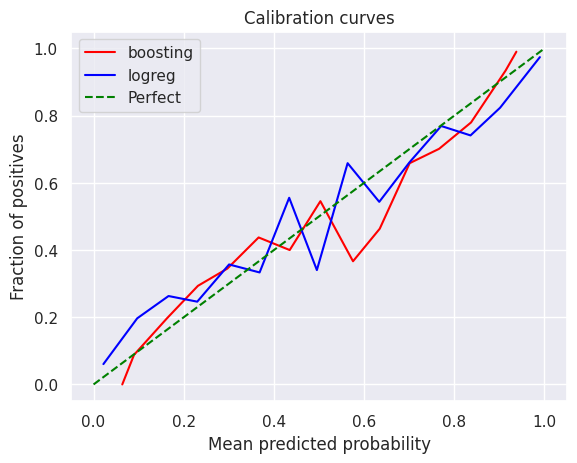

In [36]:
from sklearn.calibration import calibration_curve

boosting_preds = boosting.predict_proba(x_test)[:, 1]
logreg_preds = model.predict_proba(x_test)[:, 1]

boosting_trues, boosting_preds = calibration_curve(y_test, boosting_preds, n_bins=15)
logreg_trues, logreg_preds = calibration_curve(y_test, logreg_preds, n_bins=15)

plt.plot(boosting_preds, boosting_trues, label='boosting', color='red')
plt.plot(logreg_preds, logreg_trues, label='logreg', color='blue')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Бустинг хуже приближает к идеальной калибровочной кривой

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [13]:
boosting = Boosting(base_model_params = {'max_depth': trial.params['max_depth'],
 'min_samples_split': trial.params['min_samples_split'],
 'min_samples_leaf': trial.params['min_samples_leaf']},
                    n_estimators = trial.params['n_estimators'],
                    learning_rate = trial.params['learning_rate'],
                    subsample = trial.params['subsample'],
                    early_stopping_rounds = trial.params['early_stopping_rounds'])
boosting.fit(x_train, y_train, x_valid, y_valid)


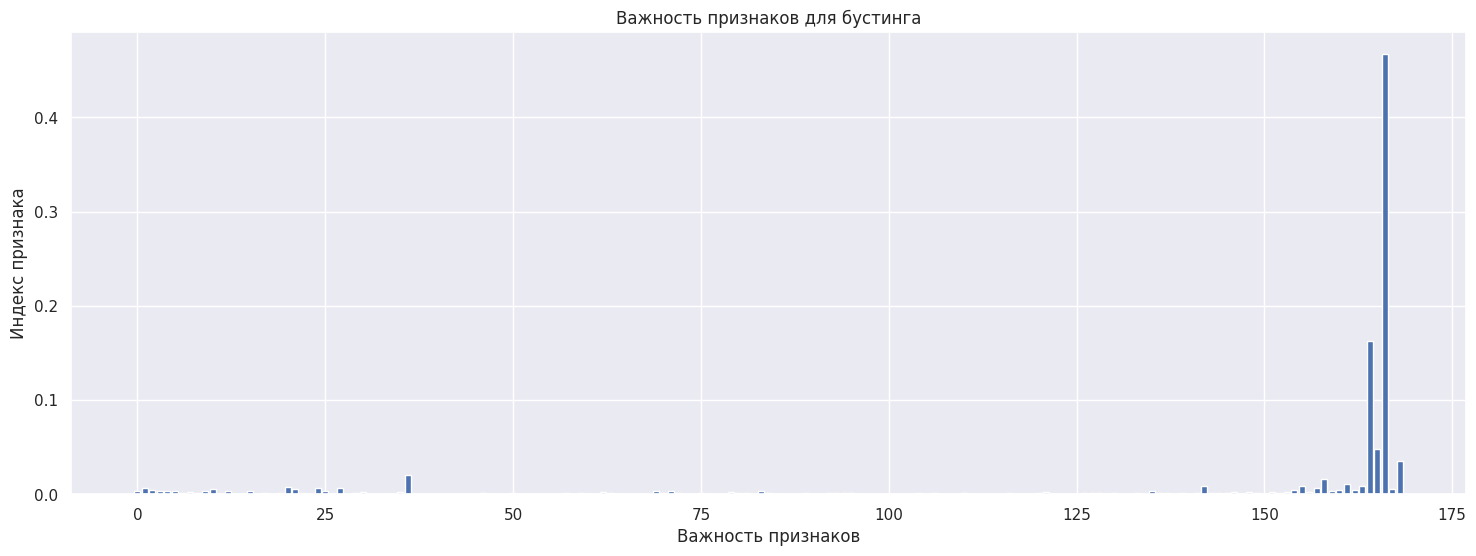

In [14]:
feature_importances = boosting.feature_importances_
feature_indices = np.arange(len(feature_importances))
plt.figure(figsize=(18, 6))
plt.bar(feature_indices, feature_importances[feature_indices], align='center')
plt.xlabel('Важность признаков')
plt.ylabel('Индекс признака')
plt.title('Важность признаков для бустинга')
plt.show()

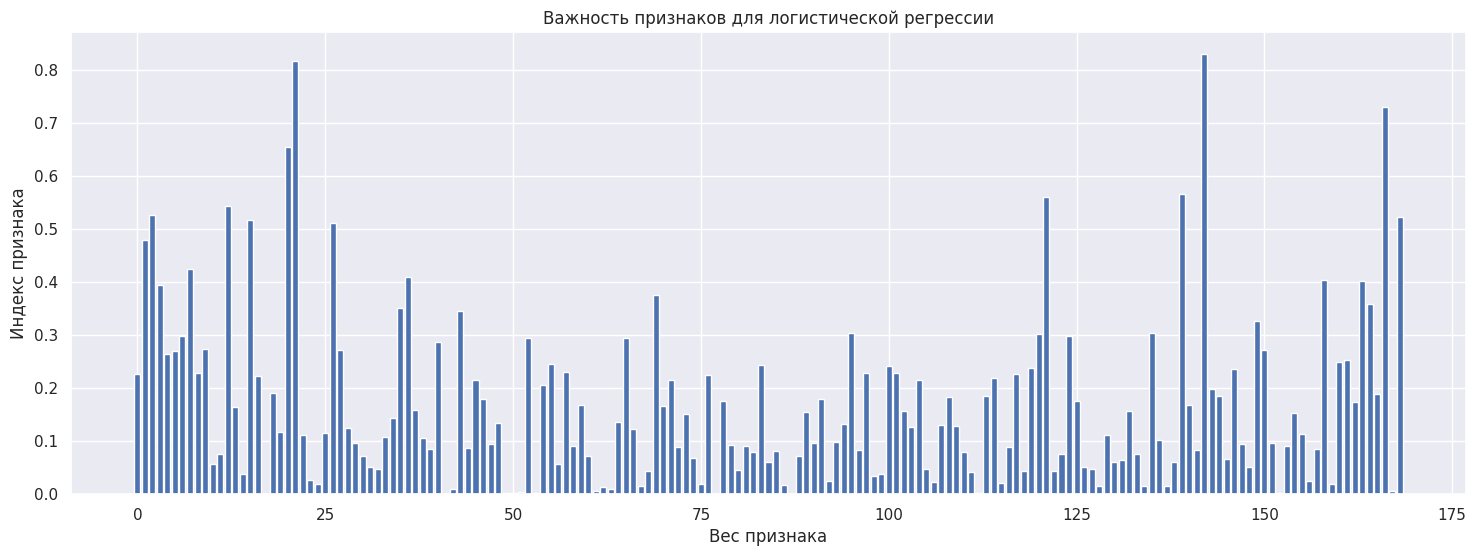

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

logreg_weights = model.coef_[0]
logreg_weights = logreg_weights / np.sum(logreg_weights)
feature_indices = np.arange(len(logreg_weights))
plt.figure(figsize=(18, 6))
plt.bar(feature_indices, np.abs(logreg_weights), align='center')
plt.xlabel('Вес признака')
plt.ylabel('Индекс признака')
plt.title('Важность признаков для логистической регрессии')
plt.show()

Как можно видеть у бустинга только совсем небольшая часть фичей имеет вес, в то время как у логрега большинство фичей оказываются важны

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [16]:
top_20_indices = np.argsort(feature_importances)[-20:]
x_train_top20 = x_train[:, top_20_indices]
x_valid_top20 = x_valid[:, top_20_indices]
x_test_top20 = x_test[: , top_20_indices]
boosting_top20 = Boosting(base_model_params = {'max_depth': trial.params['max_depth'],
 'min_samples_split': trial.params['min_samples_split'],
 'min_samples_leaf': trial.params['min_samples_leaf']},
                    n_estimators = trial.params['n_estimators'],
                    learning_rate = trial.params['learning_rate'],
                    subsample = trial.params['subsample'],
                    early_stopping_rounds = trial.params['early_stopping_rounds'])
boosting_top20.fit(x_train_top20, y_train, x_valid_top20, y_valid)
print(f"score = ", boosting_top20.score(x_test_top20, y_test))


score =  0.9384461749928754


Качество не улучшилось, а даже ухудшилось

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [56]:
import pandas as pd
model1 = boosting
model2 = model

model1.fit(x_train, y_train, x_valid, y_valid)
preds_valid_boosting = model1.predict_proba(x_valid)[:, 1]
preds_test_boosting = model1.predict_proba(x_test)[:, 1]

model2.fit(x_train, y_train)
preds_valid_logreg = model2.predict_proba(x_valid)[:, 1]
preds_test_logreg = model2.predict_proba(x_test)[:, 1]

df_valid = pd.concat([pd.DataFrame(x_valid.toarray()), pd.DataFrame(preds_valid_boosting), pd.DataFrame(preds_valid_logreg)], axis=1)
df_test= pd.concat([pd.DataFrame(x_test.toarray()), pd.DataFrame(preds_test_boosting), pd.DataFrame(preds_test_logreg)], axis=1)

model3 = LogisticRegression()
model3.fit(df_valid, y_valid)
preds_valid_blending = model3.predict_proba(df_test)[:, 1]
print("roc_auc_score = ", roc_auc_score(y_test, preds_valid_blending))

roc_auc_score =  0.9330314757928779


Качество ухудшилось

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [17]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.8 MB/s eta 0:00:00


In [18]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5805644	test: 0.5860793	best: 0.5860793 (0)	total: 56.4ms	remaining: 5.58s
99:	learn: 0.1965189	test: 0.2876473	best: 0.2875027 (79)	total: 727ms	remaining: 0us

bestTest = 0.2875026588
bestIteration = 79

Shrink model to first 80 iterations.


In [20]:
from sklearn.metrics import roc_auc_score

[autoreload of boosting failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/boosting.py", line 2
    from matplotlib.pyplot as plt
                 

In [22]:
catboost_probs = catboost_model.predict_proba(x_test)[:, 1]
catboost_roc_auc = roc_auc_score(y_test, catboost_probs)
print(f'ROC AUC using CatBoost: {catboost_roc_auc}')

ROC AUC using CatBoost: 0.9402131555619935


Катбуст дал прирост рок-аук

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

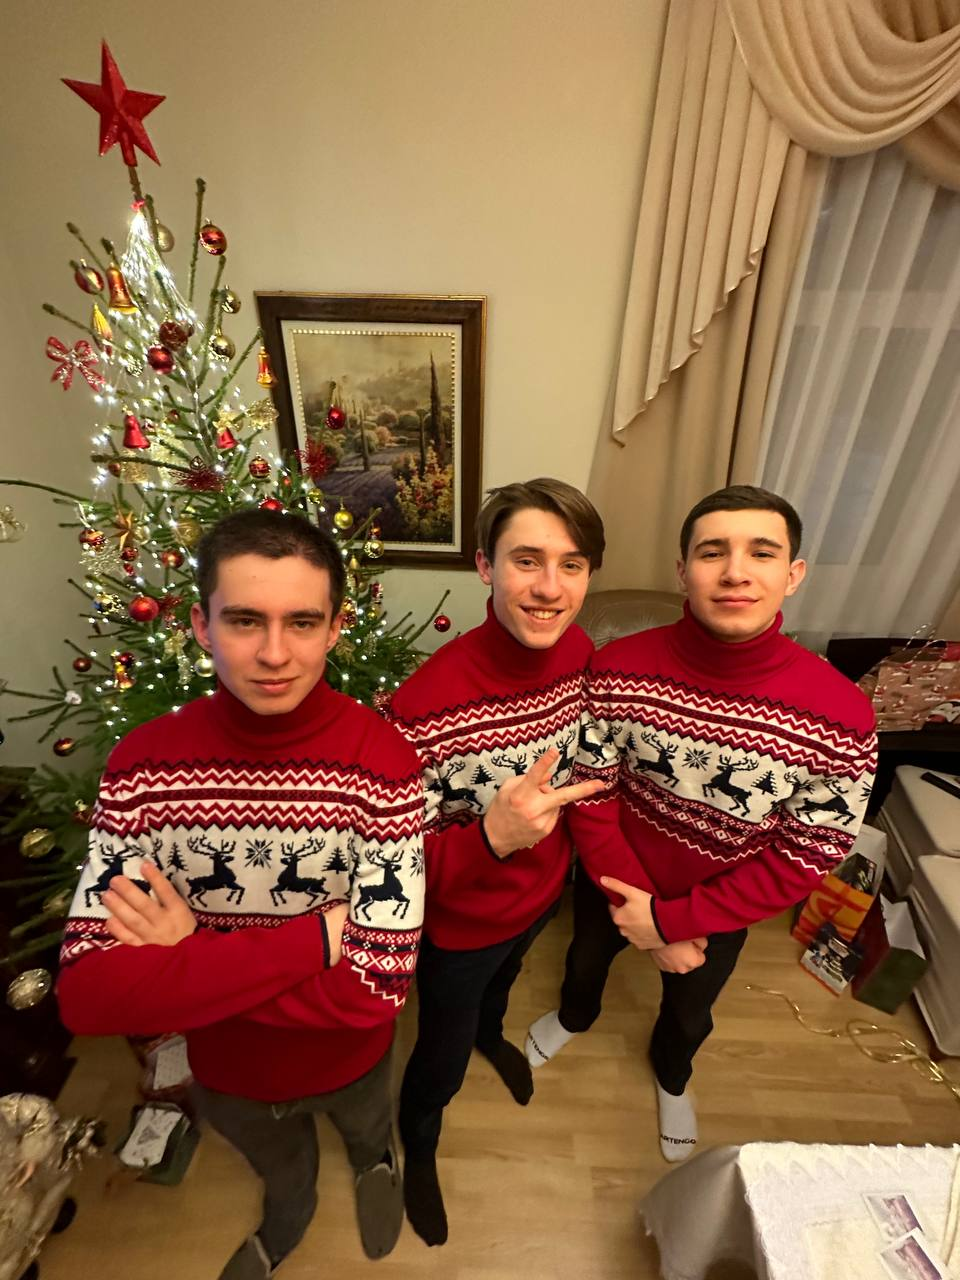